# Explore here

Predicting Diabetes

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.



In this dataset, you will find the following variables:

Pregnancies. Number of pregnancies of the patient (numeric)

Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)

SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)

Insulin. 2-hour serum insulin measures the level of insulin in your blood two hours after drinking a high glucose beverage. (measured in mu U/ml) (numeric) 

BMI. Body mass index (numeric)

DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)

Age. Age of patient (numeric)

Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, power_transform
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

In [272]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [273]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [274]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [275]:
raw_data.shape

(768, 9)

In [276]:
raw_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [277]:
raw_data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

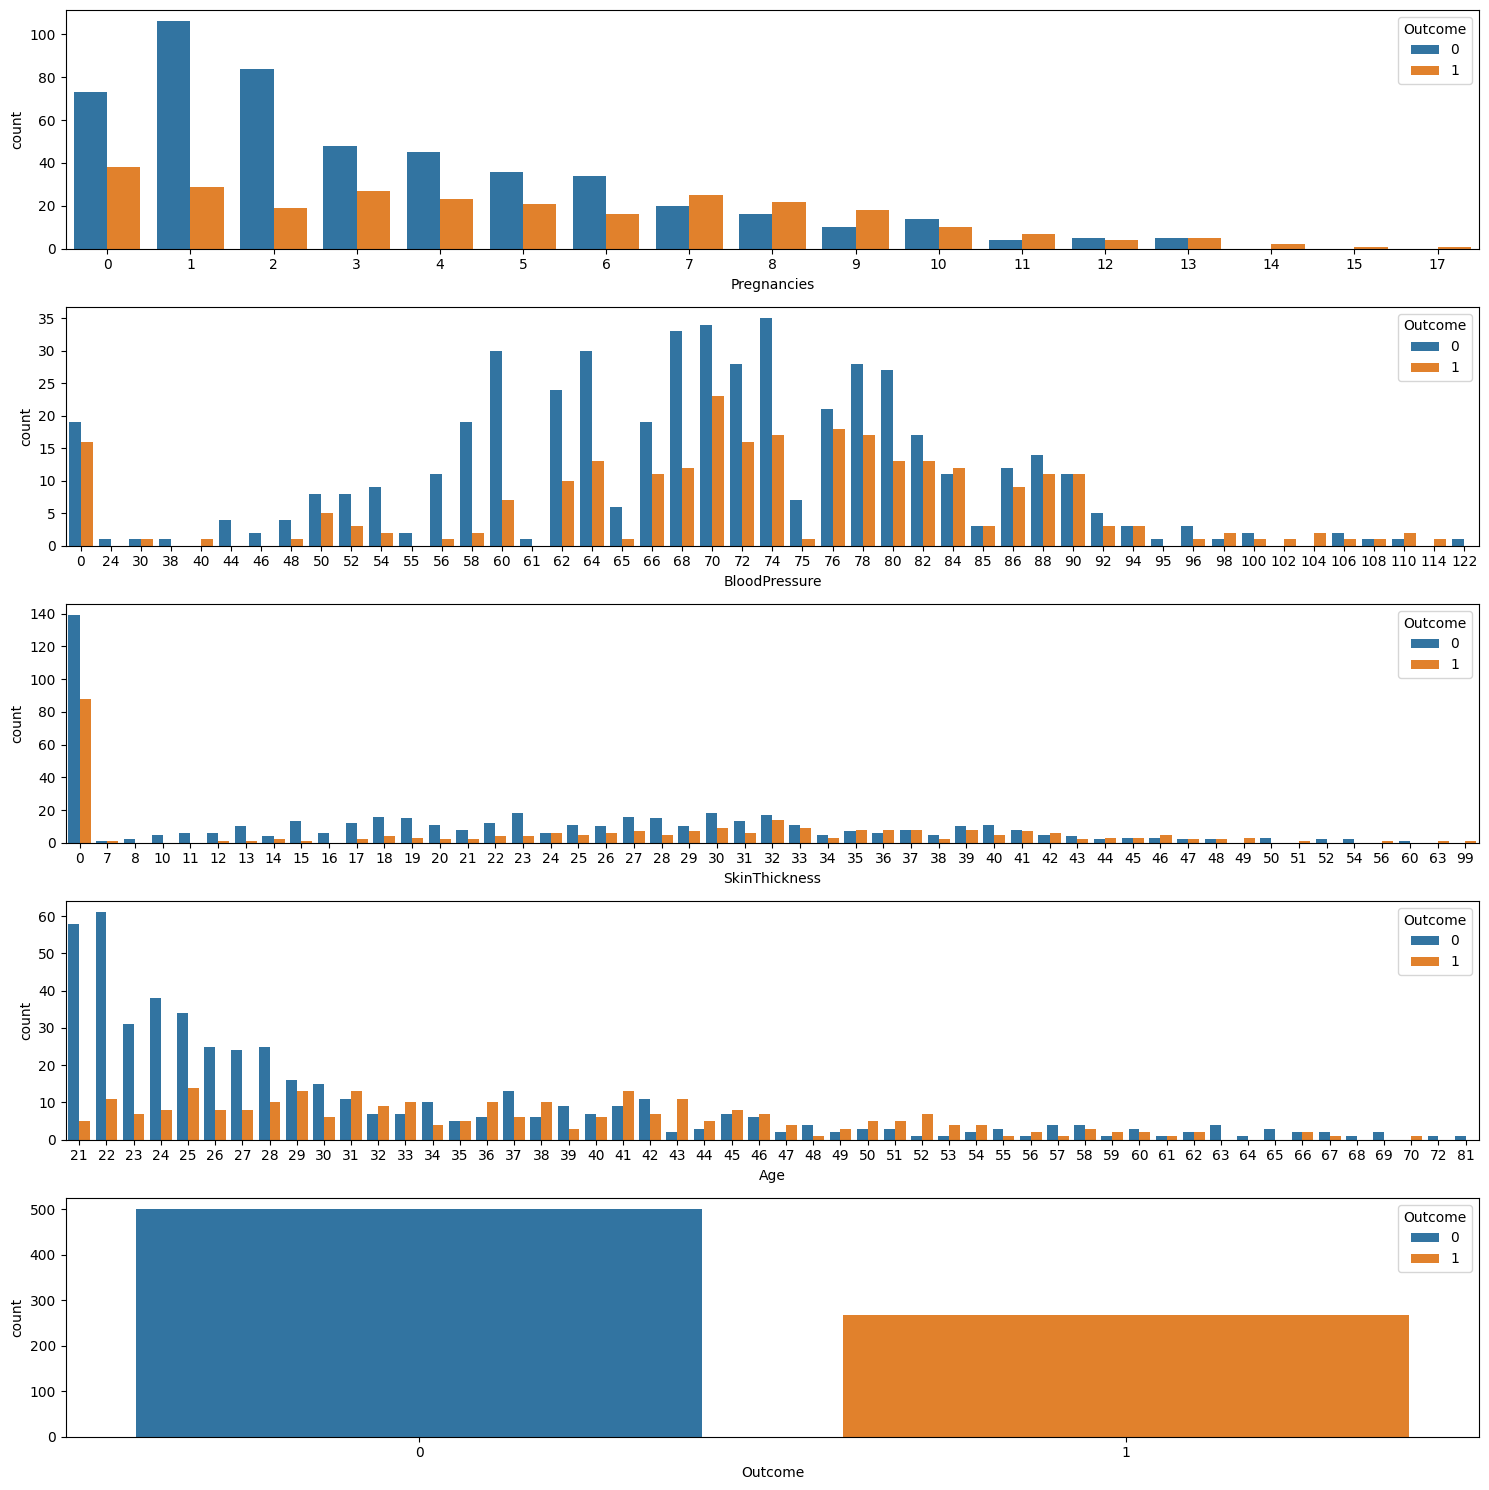

In [278]:
fig, axis = plt.subplots(figsize=(15, 15), nrows=5)
axis = axis.flatten()

variables = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Outcome']

for i, variable in enumerate(variables):
    sns.countplot(ax=axis[i], data=raw_data, x=variable, hue='Outcome')

plt.tight_layout()

plt.show()

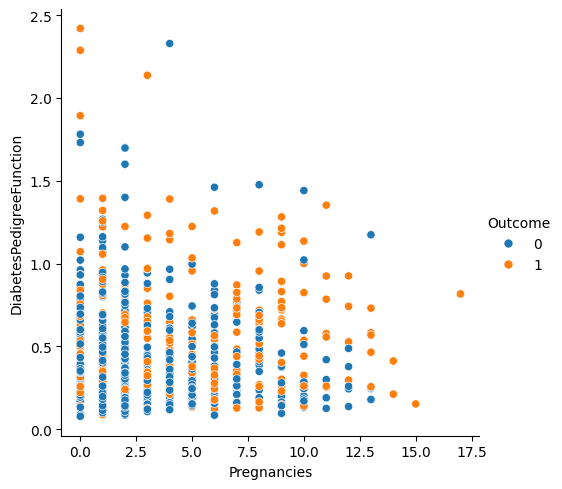

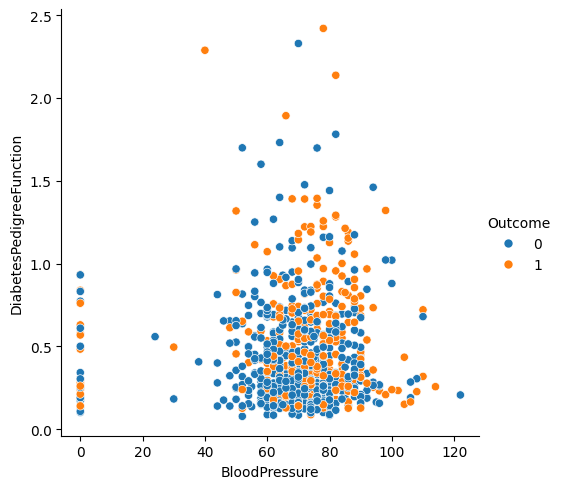

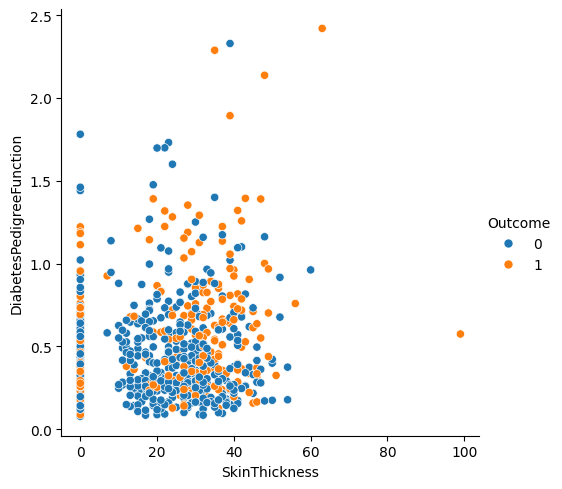

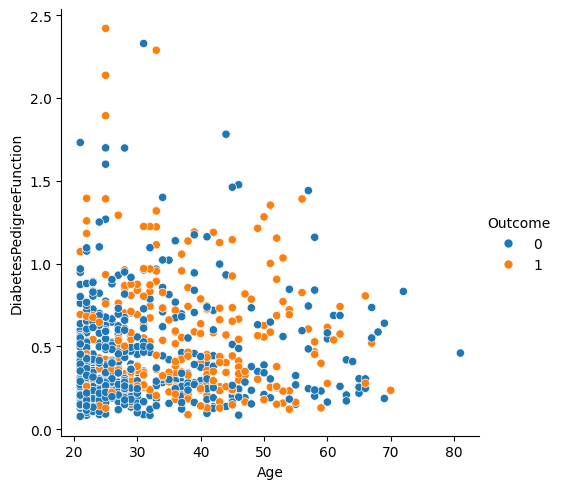

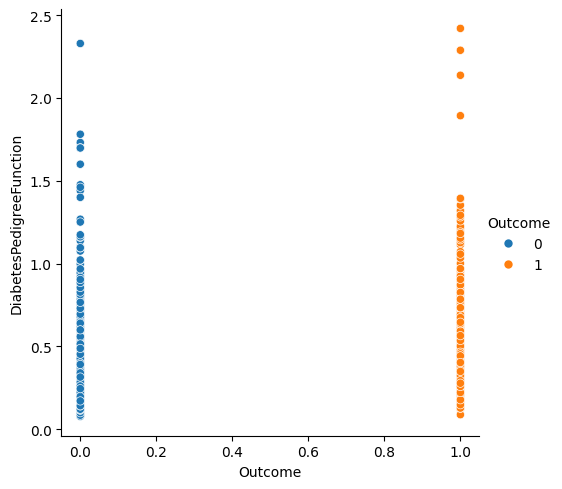

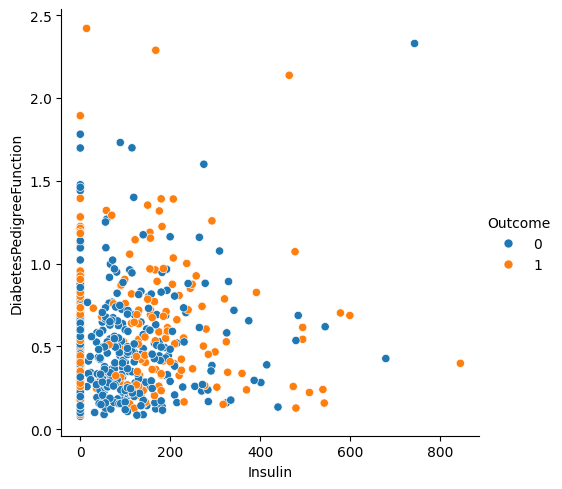

In [279]:
variables = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Outcome', 'Insulin']

for variable in variables:
    sns.relplot(data=raw_data, x=variable, y='DiabetesPedigreeFunction', hue='Outcome')

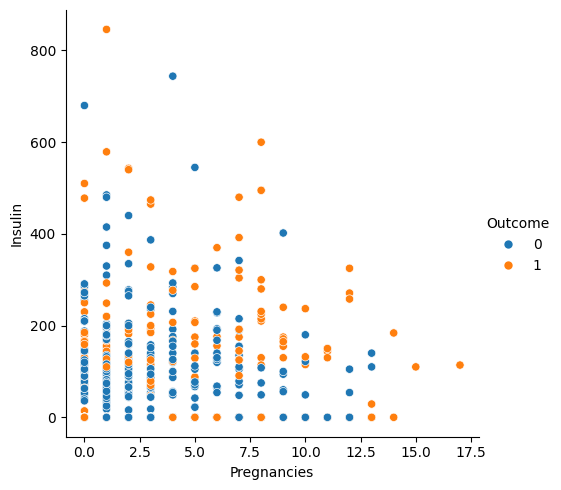

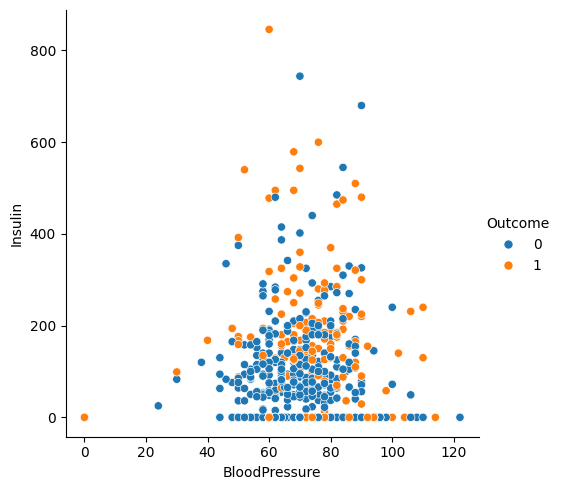

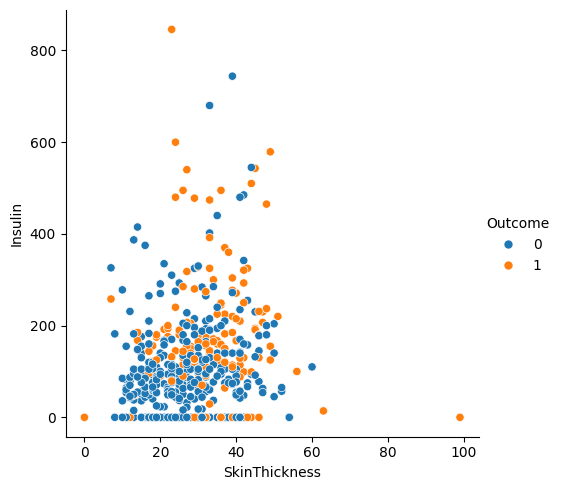

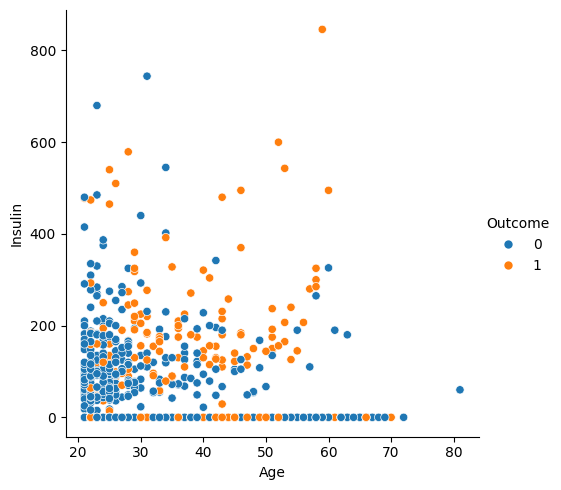

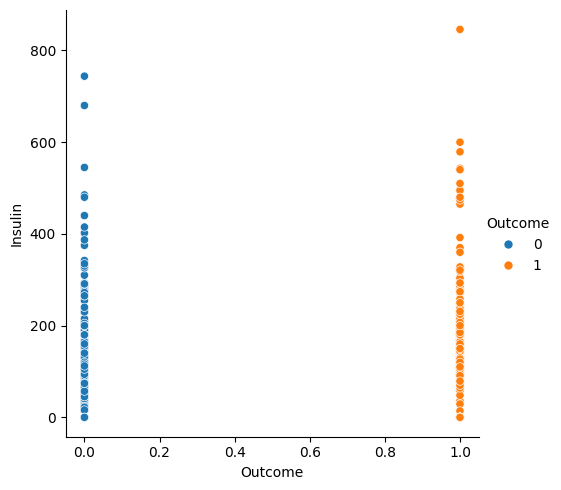

In [280]:
variables = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Outcome']

for variable in variables:
    sns.relplot(data=raw_data, x=variable, y='Insulin', hue='Outcome')

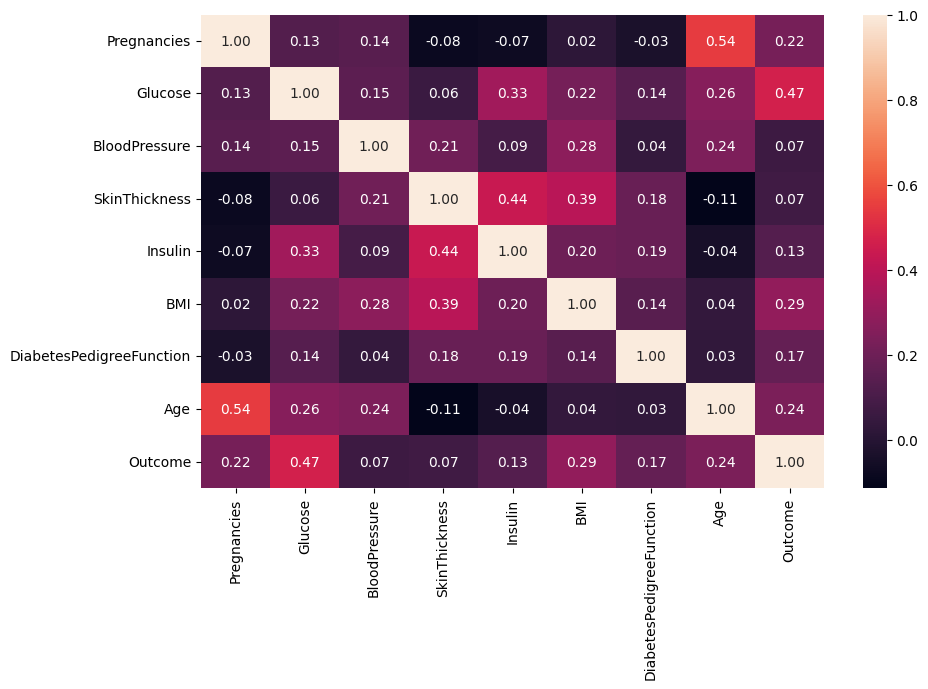

In [281]:
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(raw_data.corr(), annot=True, fmt='.2f')

plt.tight_layout()

plt.show()

## Select Features

In [282]:
X = raw_data.drop(columns='Outcome')
y = raw_data['Outcome']

In [283]:
# use either feature ranking / recursive feature elimination or SelectKBest to select the best features.
def choose_features(X, y, num_features=0):
    run_RFE = True

    if run_RFE:
        # obtain the feature names
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
        estimator = DecisionTreeClassifier()
        selector = RFE(estimator, step=1)

        selector.fit(X, y)

        selected_features = X.columns[selector.support_]

        print("Selected Features:", selected_features.tolist())

        return selected_features
    else:
        X_copy = X.copy()
        X_copy = X_copy - X_copy.min() + 1
    
        X_scaled = pd.DataFrame(power_transform(X_copy, method='box-cox'), columns=X.columns)
        
        selector = SelectKBest(f_regression, k=num_features)
        X_k_best = selector.fit_transform(X_scaled, y)
        
        feature_names = X.columns[selector.get_support()]
        X_k_best = pd.DataFrame(X_k_best, columns=feature_names)

        print(X_k_best.columns.tolist())
        
        return X_k_best.columns.tolist()
        

In [284]:
rfe_features = choose_features(X, y)

Selected Features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## Investigate Outliers

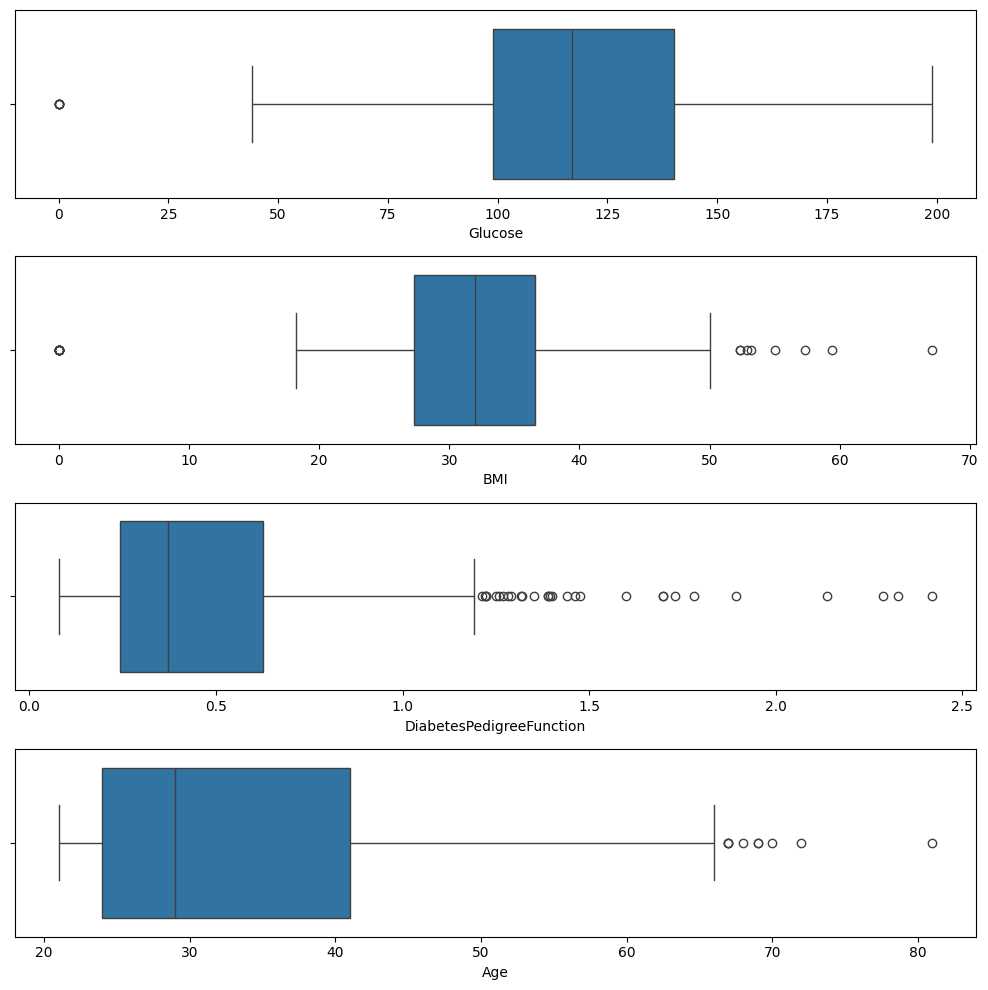

In [285]:
fig, axis = plt.subplots(figsize=(10, 10), nrows=4)
axis = axis.flatten()

features = rfe_features

for i, feature in enumerate(features):
    sns.boxplot(ax=axis[i], data=raw_data, x=feature)

plt.tight_layout()

plt.show()

In [286]:
def get_outliers(df, feature):
    stats = df[feature].describe()
    iqr = stats['75%'] - stats['25%']
    upper_limit = stats['75%'] + 1.5 * iqr
    lower_limit = stats['25%'] - 1.5 * iqr
    up_outliers = df[df[feature] > upper_limit]
    low_outliers = df[df[feature] < lower_limit]
    print(f"{feature} Outlier Upper limit: {round(upper_limit, 2)}, Lower limit: {lower_limit}")
    return up_outliers, low_outliers

In [287]:
_ , glucose_outliers = get_outliers(raw_data, 'Glucose')
glucose_outliers

Glucose Outlier Upper limit: 202.12, Lower limit: 37.125


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [288]:
bmi_up_outliers, bmi_low_outliers = get_outliers(raw_data, 'BMI')
bmi_up_outliers

BMI Outlier Upper limit: 50.55, Lower limit: 13.35


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0
303,5,115,98,0,0,52.9,0.209,28,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


In [289]:
bmi_low_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [290]:
DPF_outliers, _ = get_outliers(raw_data, 'DiabetesPedigreeFunction')
DPF_outliers

DiabetesPedigreeFunction Outlier Upper limit: 1.2, Lower limit: -0.32999999999999996


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [291]:
age_outliers, _ = get_outliers(raw_data, 'Age')
age_outliers

Age Outlier Upper limit: 66.5, Lower limit: -1.5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


## Split Data into training and testing sets

In [292]:
X = raw_data[rfe_features]
y = raw_data['Outcome']

In [293]:
X

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33
...,...,...,...,...
763,101,32.9,0.171,63
764,122,36.8,0.340,27
765,121,26.2,0.245,30
766,126,30.1,0.349,47


In [294]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
X_train

,Glucose,BMI,DiabetesPedigreeFunction,Age
60,84,0.0,0.304,21
618,112,28.2,1.282,50
346,139,28.7,0.654,22
294,161,21.9,0.254,65
231,134,46.2,0.238,46
...,...,...,...,...
71,139,28.6,0.411,26
106,96,22.4,0.207,27
270,101,45.6,1.136,38
435,141,42.4,0.205,29


## Fill values that are 0 with the sample mean

In [297]:
def fill_mean(df, feature, outlier_limit):
    mean_value = df[feature].replace(0, float('nan')).mean()  # Avoid bias by ignoring zeros in mean calculation
    df[feature] = df[feature].replace(0, mean_value)
    print(df[df[feature] < outlier_limit])
    return df

In [ ]:
X_train = fill_mean(X_train, 'Glucose', 35.0)

In [ ]:
X_test = fill_mean(X_test, 'Glucose', 35.0)

In [300]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

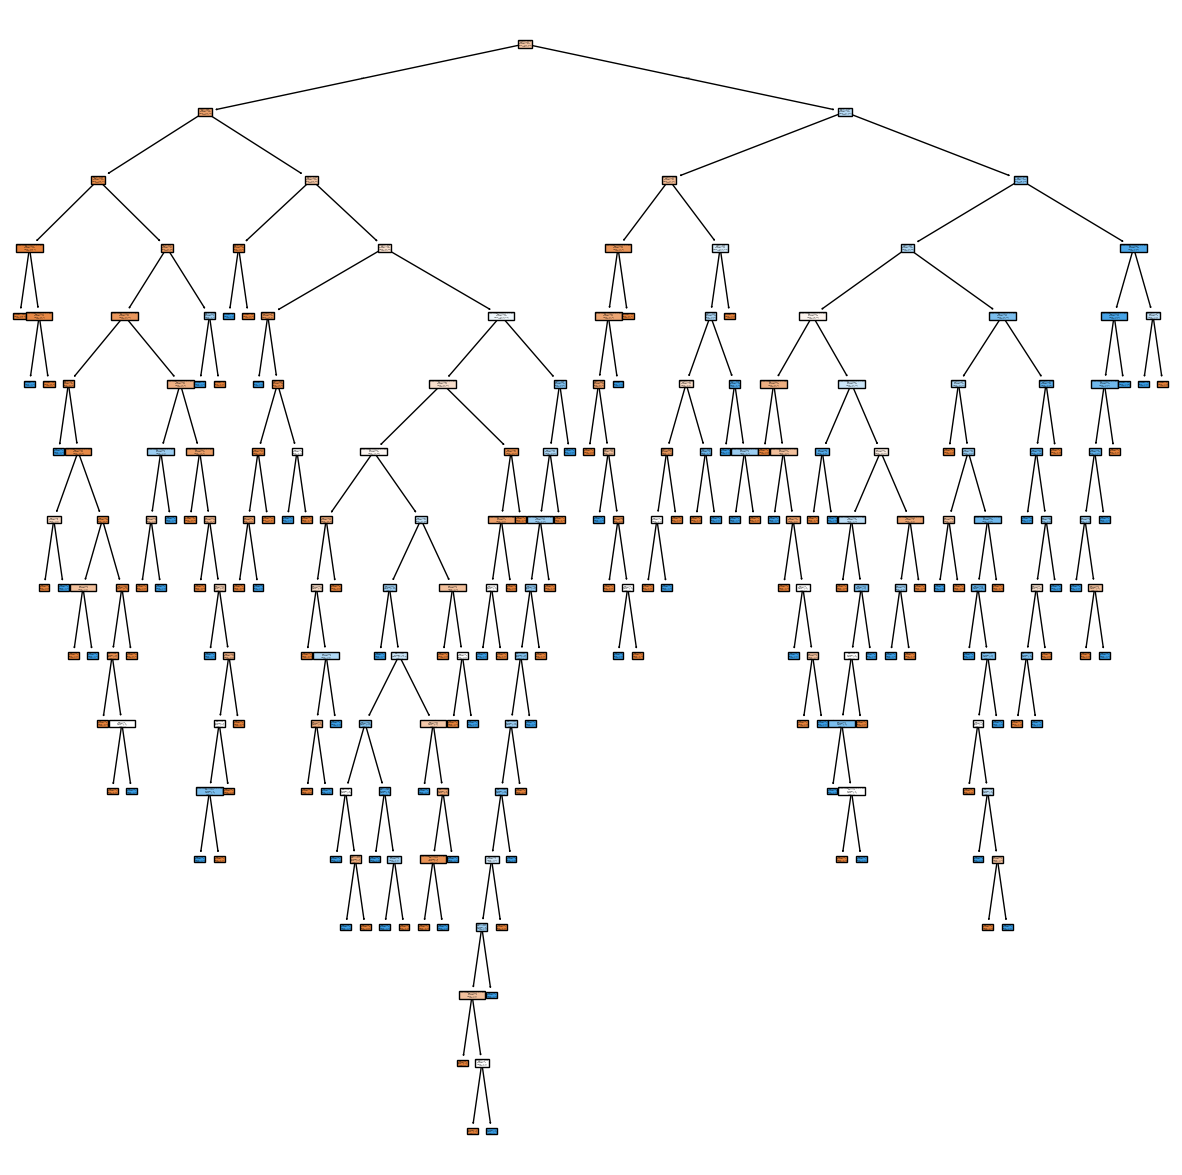

In [301]:
from sklearn import tree

fig = plt.figure(figsize=(15, 15))

tree.plot_tree(decision_tree_model, feature_names= list(X_train.columns), class_names=['0', '1'], filled=True)

plt.show()

In [302]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [303]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7272727272727273